In [16]:
import pandas as pd

df = pd.read_csv("../data/processed/imdb_clean_base.csv")
df.head()

,review,sentiment,review_length,clean_review
0,One of the other reviewers has mentioned that ...,1,307,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,1,162,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,166,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,138,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230,petter matteis love time money visually stunni...


In [3]:
X = df['clean_review']
y = df['sentiment']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [8]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [7]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = nb.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8558
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      5000
           1       0.85      0.86      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



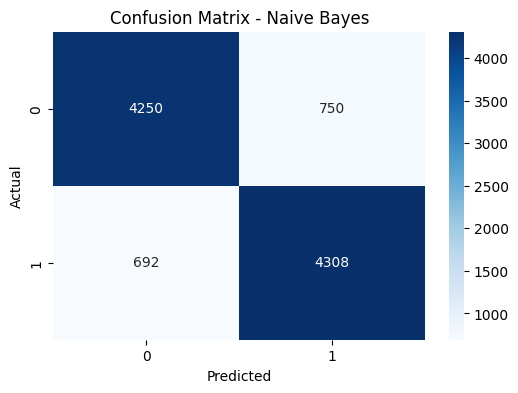

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Pozitif sınıfa ait olasılık skorları
y_pred_prob = nb.predict_proba(X_test_tfidf)[:, 1]

# AUC skorunu hesapla
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc)

AUC Score: 0.9305992


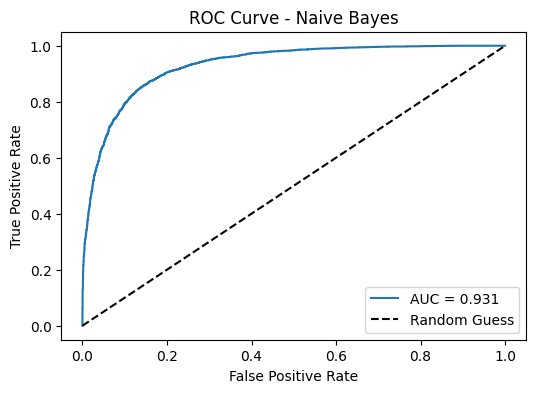

In [11]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes")
plt.legend()
plt.show()

In [12]:
import joblib

# Modeli kaydet
joblib.dump(nb, "sentiment_nb_model.pkl")

# TF-IDF vektörizerini kaydet
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

print("Model and TF-IDF vectorizer saved successfully.")

Model and TF-IDF vectorizer saved successfully.


In [19]:
import re
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<br\s*/?>', ' ', text)   # HTML tag temizleme
    text = re.sub(r'[^a-zA-Z]', ' ', text)   # Harf dışı karakterleri sil
    words = text.split()
    words = [w for w in words if w not in stop_words]  # stopwords temizleme
    return ' '.join(words)

In [20]:
loaded_model = joblib.load("sentiment_nb_model.pkl")
loaded_tfidf = joblib.load("tfidf_vectorizer.pkl")

sample = "This movie was amazing and I loved every part of it."
sample_clean = clean_text(sample)
sample_vector = loaded_tfidf.transform([sample_clean])
print(loaded_model.predict(sample_vector))

[1]


In [21]:
def predict_sentiment(review):
    review_clean = clean_text(review)
    review_vector = loaded_tfidf.transform([review_clean])
    prediction = loaded_model.predict(review_vector)[0]
    if prediction == 1:
        return "Positive 🙂"
    else:
        return "Negative 🙁"

In [22]:
predict_sentiment("I hated the movie, it was boring and slow.")

'Negative 🙁'